0.4384174561320197
0.21931787068672592


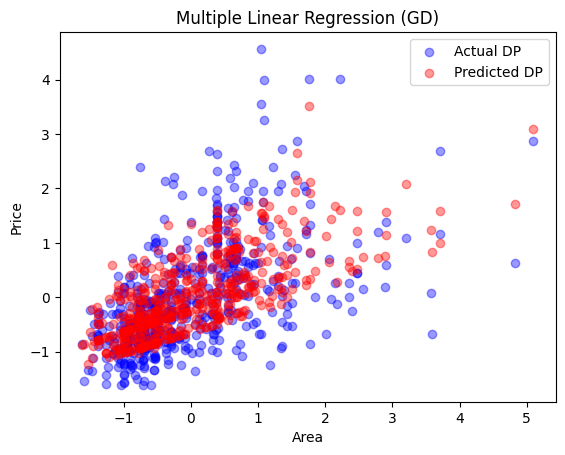

In [8]:
# multiple linear regression using GD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score

csv_data = pd.read_csv('Housing.csv')

x_pn = np.array(
    csv_data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']])
y_pn = np.array(csv_data['price'])

# normalization
x = (x_pn-np.mean(x_pn, axis=0))/np.std(x_pn, axis=0)
y = (y_pn-np.mean(y_pn))/np.std(y_pn)


def MultipleLinearRegression_GD(x, y, iteration, learning_rate):
    n = len(y)
    y = y.reshape(-1, 1)
    X = np.c_[np.ones((n, 1)), x]
    beta = np.zeros((X.shape[1], 1))

    for _ in range(iteration):
        y_pred = X @ beta
        cf = y_pred - y
        # gradient
        dm = (1/n)*(X.T @ cf)
        beta -= learning_rate*dm

    # model prediction
    y_prediction = X @ beta

    # model evaluation
    mse = mean_squared_error(y_prediction,y)
    r2=r2_score(y_prediction,y)
    print(mse)
    print(r2)

    # plotting
    plt.scatter(x[:,0],y,color='blue',alpha=0.4,label='Actual DP')
    plt.scatter(x[:,0],y_prediction,color='red',alpha=0.4,label='Predicted DP')
    plt.legend()
    plt.xlabel('Area')
    plt.ylabel('Price')
    plt.title('Multiple Linear Regression (GD)')
    plt.show()


MultipleLinearRegression_GD(x, y, 10000, 0.1)